### Functions to Fit Light Curves

<br>**Author(s):** Weixiang Yu
<br>**Last run:** 10-16-20
<br>**Short description:** Put together a few functions to fit light curves using CARMA 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os, sys
%matplotlib inline

# use mpl style on github
mpl.rc_file('https://raw.githubusercontent.com/ywx649999311/project_template'
            '/master/%7B%7Bcookiecutter.project_name%7D%7D/src/vis/mpl/yu_basic.rc')

pd.set_option('display.max_columns', 999)

In [22]:
from agntk.carma.CARMATerm import *
from agntk.lc.carma import *
from scipy.optimize import differential_evolution, minimize
from celerite import GP
import celerite

In [5]:
from joblib import Parallel, delayed

### 1. DRW fit

In [93]:
drw3 = DRW_term(np.log(0.25), np.log(300))
t, y, yerr = gpSimRand(drw3, 50, 365 * 10.0, 500, nLC=500, season=False)

In [94]:
# fit
# dask_ls = []
# for i in range(len(t)):
#     dask_ls.append(delayed(drw_fit)(t[i], y[i], yerr[i]))

best_fit_drw = np.array(Parallel(n_jobs=-1)(delayed(drw_fit)(t[i], y[i], yerr[i]) for i in range(len(t))))

# compute perturb
perturb = np.sqrt(2*np.exp(drw3.parameter_vector[0])**2/np.exp
                  (drw3.parameter_vector[1]))
best_perturb = np.sqrt(2*best_fit_drw[:,0]**2/best_fit_drw[:,1])

Text(0.5, 0, 'Error in log')

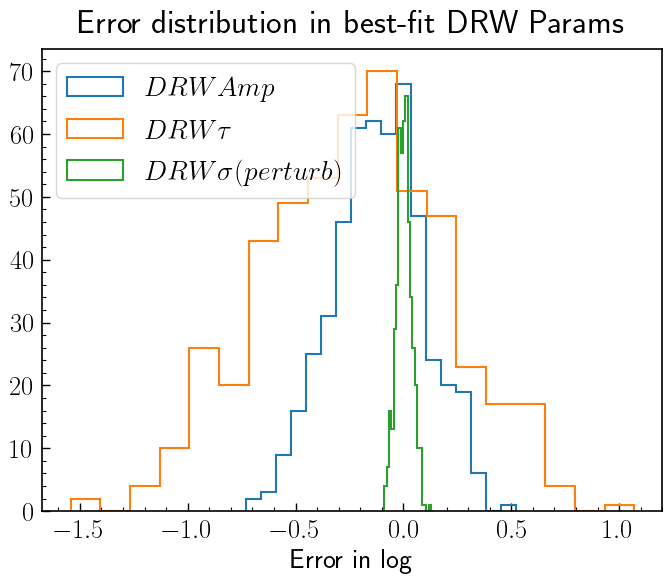

In [95]:
# plot
_ = plt.hist(np.log(best_fit_drw[:,0]) - drw3.parameter_vector[0], bins='fd', histtype='step', linewidth=1.5, label="$DRW Amp$")
_ = plt.hist((np.log(best_fit_drw[:,1]) - drw3.parameter_vector[1]), bins='fd', histtype='step', linewidth=1.5, label="$DRW \\tau$")
_ = plt.hist(np.log(best_perturb) - np.log(perturb), bins='fd', histtype='step', linewidth=1.5, label="$DRW \\sigma (perturb)$")
plt.title('Error distribution in best-fit DRW Params')
plt.legend(fontsize=20)
plt.xlabel('Error in log')

### 2. DHO fit

In [198]:
nLC = 300
dho1 = DHO_term(np.log(0.03939692), np.log(0.00027941), np.log(0.0046724), np.log(0.0256982))
t, y, yerr = gpSimRand(dho1, 50, 365 * 10.0, 1000, nLC=nLC, season=False)

In [119]:
# fit
# dask_ls = []
# for i in range(nLC):
#     dask_ls.append(delayed(dho_fit)(t[i], y[i], yerr[i]))

best_fit_dho = np.array(Parallel(n_jobs=-1)(delayed(dho_fit)(t[i], y[i], yerr[i]) for i in range(len(t))))

Text(0.5, 0, 'Error in log')

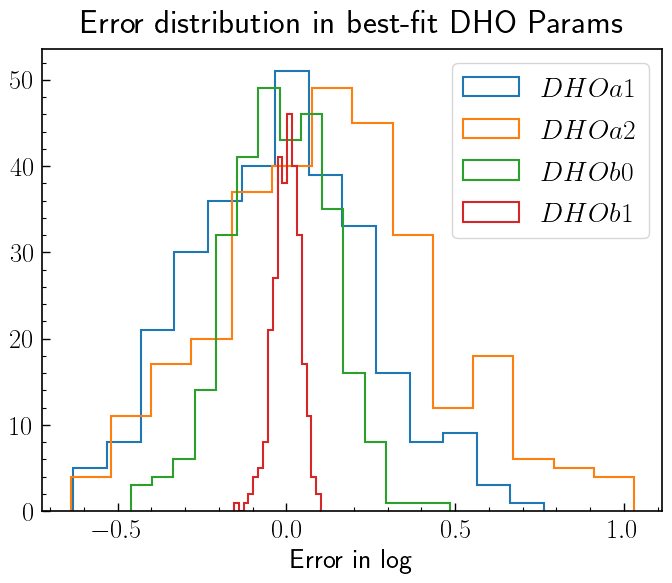

In [120]:
# plot
_ = plt.hist(np.log(best_fit_dho[:,0]) - dho1.parameter_vector[0], 
    bins='fd', histtype='step', linewidth=1.5, label="$DHO a1$")
_ = plt.hist((np.log(best_fit_dho[:,1]) - dho1.parameter_vector[1]), 
    bins='fd', histtype='step', linewidth=1.5, label="$DHO a2$")
_ = plt.hist(np.log(best_fit_dho[:,2]) - dho1.parameter_vector[2], 
    bins='fd', histtype='step', linewidth=1.5, label="$DHO b0$")
_ = plt.hist((np.log(best_fit_dho[:,3]) - dho1.parameter_vector[3]), 
    bins='fd', histtype='step', linewidth=1.5, label="$DHO b1$")
plt.title('Error distribution in best-fit DHO Params')
plt.legend(fontsize=20)
plt.xlabel('Error in log')

In [178]:
nLC = 300
dho1 = CARMA_term(np.log([0.06, 0.0001]), np.log([0.0046724, 0.0156982]))
t, y, yerr = gpSimRand(dho1, 50, 365 * 10.0, 1000, nLC=nLC, season=False)

In [179]:
# fit
# dask_ls = []
# for i in range(nLC):
#     dask_ls.append(delayed(dho_fit)(t[i], y[i], yerr[i]))

best_fit_dho = np.array(Parallel(n_jobs=-1)(delayed(carma_fit)(t[i], y[i], yerr[i], 2, 1) for i in range(len(t))))

Text(0.5, 0, 'Error in log')

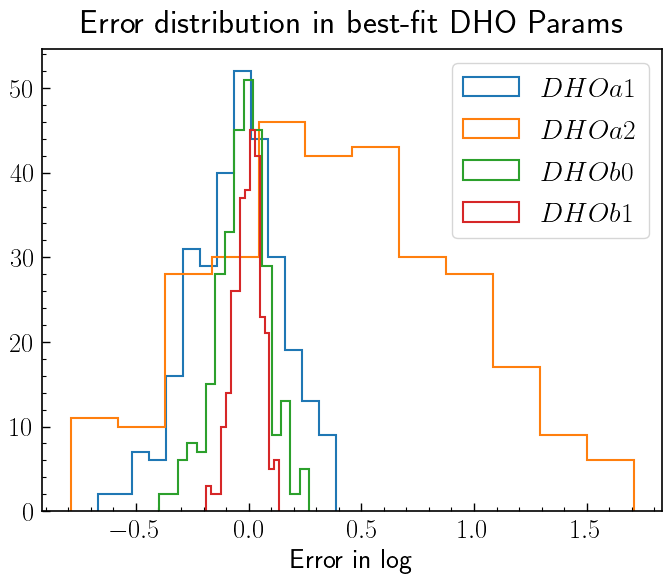

In [180]:
# plot
_ = plt.hist(np.log(best_fit_dho[:,0]) - dho1.parameter_vector[0], 
    bins='fd', histtype='step', linewidth=1.5, label="$DHO a1$")
_ = plt.hist((np.log(best_fit_dho[:,1]) - dho1.parameter_vector[1]), 
    bins='fd', histtype='step', linewidth=1.5, label="$DHO a2$")
_ = plt.hist(np.log(best_fit_dho[:,2]) - dho1.parameter_vector[2], 
    bins='fd', histtype='step', linewidth=1.5, label="$DHO b0$")
_ = plt.hist((np.log(best_fit_dho[:,3]) - dho1.parameter_vector[3]), 
    bins='fd', histtype='step', linewidth=1.5, label="$DHO b1$")
plt.title('Error distribution in best-fit DHO Params')
plt.legend(fontsize=20)
plt.xlabel('Error in log')

### 3. CARMA fit
#### 3.1 CARMA(2,0)

In [163]:
nLC = 500
carma20a = CARMA_term(np.log([0.08, 0.00027941]), np.log([0.0046724]))
t, y, yerr = gpSimRand(carma20a, 50, 365 * 10.0, 500, nLC=nLC, season=False)

In [164]:
best_fit_carma = np.array(Parallel(n_jobs=-1)(delayed(carma_fit)(t[i], y[i], yerr[i], 2, 0) for i in range(len(t))))

Text(0.5, 0, 'Error in log')

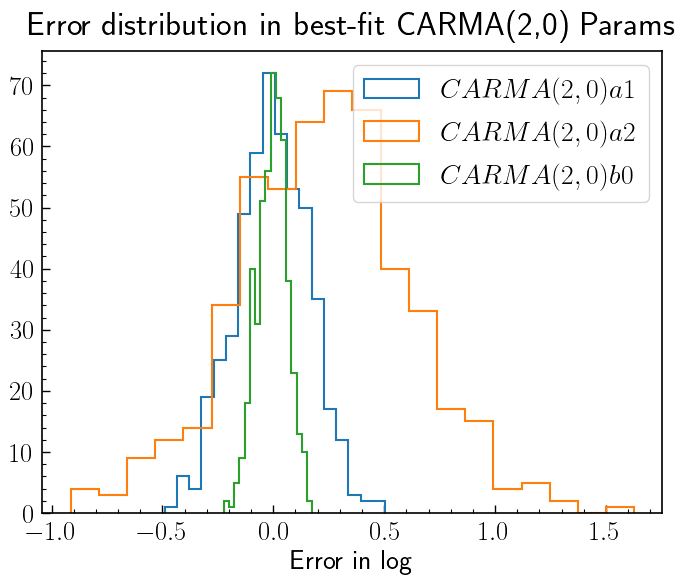

In [165]:
# plot
_ = plt.hist(np.log(best_fit_carma[:,0]) - carma20a.parameter_vector[0], bins='fd', histtype='step', linewidth=1.5, label="$CARMA(2,0) a1$")
_ = plt.hist((np.log(best_fit_carma[:,1]) - carma20a.parameter_vector[1]), bins='fd', histtype='step', linewidth=1.5, label="$CARMA(2,0) a2$")
_ = plt.hist(np.log(best_fit_carma[:,2]) - carma20a.parameter_vector[2], bins='fd', histtype='step', linewidth=1.5, label="$CARMA(2,0) b0$")
# _ = plt.hist((np.log(best_fit_carma[:,3]) - carma20a.parameter_vector[3]), bins='fd', histtype='step', linewidth=1.5, label="$CARMA(3,0) b0$")
plt.title('Error distribution in best-fit CARMA(2,0) Params')
plt.legend(fontsize=20)
plt.xlabel('Error in log')

In [172]:
nLC = 500
carma20b = CARMA_term(np.log([0.04, 0.00027941]), np.log([0.46724]))
t, y, yerr = gpSimRand(carma20a, 50, 365 * 10.0, 500, nLC=nLC, season=False)

In [173]:
best_fit_carma = np.array(Parallel(n_jobs=-1)(delayed(carma_fit)(t[i], y[i], yerr[i], 2, 0) for i in range(len(t))))

Text(0.5, 0, 'Error in log')

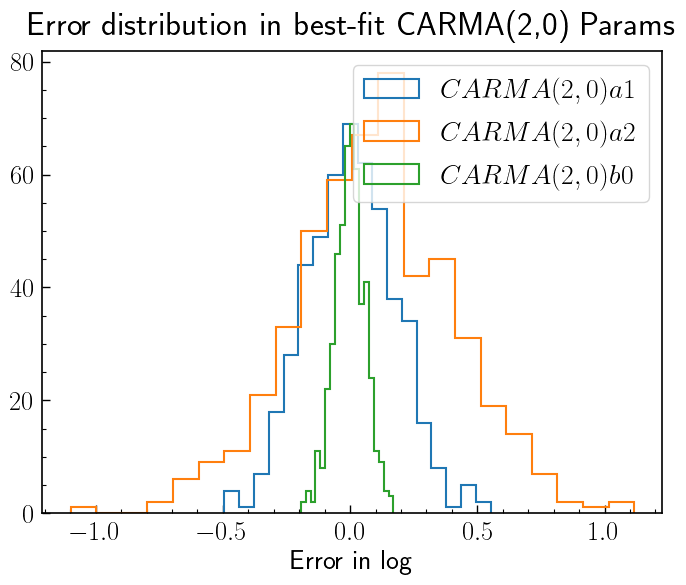

In [174]:
# plot
_ = plt.hist(np.log(best_fit_carma[:,0]) - carma20b.parameter_vector[0], bins='fd', histtype='step', linewidth=1.5, label="$CARMA(2,0) a1$")
_ = plt.hist((np.log(best_fit_carma[:,1]) - carma20b.parameter_vector[1]), bins='fd', histtype='step', linewidth=1.5, label="$CARMA(2,0) a2$")
_ = plt.hist(np.log(best_fit_carma[:,2]) - carma20b.parameter_vector[2], bins='fd', histtype='step', linewidth=1.5, label="$CARMA(2,0) b0$")
plt.title('Error distribution in best-fit CARMA(2,0) Params')
plt.legend(fontsize=20)
plt.xlabel('Error in log')

#### 3.2 CARMA(3,0)
This is taking too long, may need to search for better optimizer. 

<span style='color:red'>__Note:__</span> Time scales still play an important role in how well we can fit the light curves for high-order CARMA models. The likelihood tends to be bimodal when the intrinsic timescales and too close to each, in particular when MA timescale gets large. Also, when the light curve is sparse than the smallest time scale, the fitting also degrade. Like what was observed in DRW, the large undercetainty and shift most come from our in ability to sample light curves that have long decorrelation timescales, in other words, longer light curves will help. 

**In addition,** Models beyond CARMA(2, 1) are still too slow to fit, MCMC might still be a good solution. 